<a href="https://colab.research.google.com/github/LinjingBi/ai_robotics_lab/blob/main/week8/RL_model_based.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




# SEMTM0016 Week 20: Value based Reinforcement Learning - MDP and Model-based Methods

## Instructions
1.   To start this notebook, please duplicate this notebook at first:
  - Choose "File => Save a copy in Drive" and open/run it in Colab.
  - Or you can download the notebook and run it in your local jupyter notebook server.
2.   For the coding assignment and practice, please write your code at `### TODO ###` blocks or in a new cell. For analysis report, you are free to use as many blocks as you need.


# Section I: The basics of Markov decision process (MDP)

A Markov decision process (MDP) is a Markov reward process with
decisions. It is an environment in which all states are Markov dependent, which means that the future is independent of the past given the present. A state $S_{t}$ is Markov if and only if

$$
\mathbb{P}\left[S_{t+1} \mid S_{t}\right]=\mathbb{P}\left[S_{t+1} \mid S_{1}, \ldots, S_{t}\right]
$$

A Markov Decision Process is a tuple $\langle\mathcal{S}, \mathcal{A}, \mathcal{P}, \mathcal{R}, \gamma\rangle$
* S is a finite set of states
* A is a finite set of actions
* P is a state transition probability matrix, $\mathcal{P}_{s s^{\prime}}^{a}=\mathbb{P}\left[S_{t+1}=s^{\prime} \mid S_{t}=s, A_{t}=a\right]$
* R is a reward function, $\mathcal{R}_{s}^{a}=\mathbb{E}\left[R_{t+1} \mid S_{t}=s, A_{t}=a\right]$
* $\gamma$ is a discount factor $\gamma \in[0,1]$.

The state-value function $v_{\pi}(s)$ of an MDP is the expected return starting from state $s$, and then following policy $\pi$

$$
V_{\pi}(s)=\mathbb{E}_{\pi}\left[\sum_{k=0}^{\infty} \gamma^{k} R_{t+k+1} \mid S_{t}=s\right]
$$

The action-value function $q_{\pi}(s, a)$ is the expected return starting from state $s$, taking action $a$, and then following policy $\pi$


$$
Q_{\pi}(s, a)=\mathbb{E}_{\pi}\left[\sum_{k=0}^{\infty} \gamma^{k} R_{t+k+1} \mid S_{t}=s, A_{t}=a\right]
$$



where a policy $\pi$ is a distribution over actions given states,

$$
\pi(a \mid s)=\mathbb{P}\left[A_{t}=a \mid S_{t}=s\right]
$$

From the definition above, we can derive the Bellman Expectation Equation over value function:

$$
V_{\pi}(s)=\sum_{a \in \mathcal{A}} \pi(a \mid s) Q_{\pi}(s, a) \tag{1}
$$

$$
Q_{\pi}(s, a)=\mathcal{R}_{s}^{a}+\gamma \sum_{s^{\prime} \in \mathcal{S}} \mathcal{P}_{s s^{\prime}}^{a} V_{\pi}\left(s^{\prime}\right) \tag{2}
$$

$$
V_{\pi}(s)=\sum_{a \in \mathcal{A}} \pi(a \mid s)\left(\mathcal{R}_{s}^{a}+\gamma \sum_{s^{\prime} \in \mathcal{S}} \mathcal{P}_{s s^{\prime}}^{a} V{\pi}\left(s^{\prime}\right)\right) \tag{3}
$$


$$
Q_{\pi}(s, a)=\mathcal{R}_{s}^{a}+\gamma \sum_{s^{\prime} \in \mathcal{S}} \mathcal{P}_{s s^{\prime}}^{a} \sum_{a^{\prime} \in \mathcal{A}} \pi\left(a^{\prime} \mid s^{\prime}\right) Q_{\pi}\left(s^{\prime}, a^{\prime}\right) \tag{4}
$$


The optimal state-value function $V_{*}(s)$ is the maximum value function over all policies

$$
V_{*}(s)=\max _{\pi} V_{\pi}(s)
$$

The optimal action-value function $Q_{*}(s, a)$ is the maximum action-value function over all policies

$$
Q_{*}(s, a)=\max _{\pi} Q_{\pi}(s, a)
$$

And the Bellman Optimal Equation can be derived as:
$$
V_{*}(s)=\max _{a} Q_{*}(s, a) \tag{5}
$$

$$
Q_{*}(s, a)=\mathcal{R}_{s}^{a}+\gamma \sum_{s^{\prime} \in \mathcal{S}} \mathcal{P}_{s s^{\prime}}^{a} V_{*}\left(s^{\prime}\right) \tag{6}
$$

$$
V_{*}(s)=\max _{a} \mathcal{R}_{s}^{a}+\gamma \sum_{s^{\prime} \in \mathcal{S}} \mathcal{P}_{s s^{\prime}}^{a} V_{*}\left(s^{\prime}\right) \tag{7}
$$


$$
Q_{*}(s, a)=\mathcal{R}_{s}^{a}+\gamma \sum_{s^{\prime} \in \mathcal{S}} \mathcal{P}_{s s^{\prime}}^{a} \max _{a^{\prime}} Q_{*}\left(s^{\prime}, a^{\prime}\right)\tag{8}
$$

# Section II: Model-based learning (Policy Iteration/Value Iteration)

When the environment is known for us, we can solve for the optimal value function and optimal policy by dynamic programming. Two classical algorithms of dynamic programming is Policy Iteration (PI) and Value Iteration (VI).

The core of **policy iteration** is the alternating procedure between policy evaluation and policy improvement.
* In policy evaluation phase, we need to estimate the value function of current policy $\pi$ by iterative applying the Bellman Expectation Equation (equation (3)) until the value function $V_{\pi}$ converges.
* In policy improvement phase, we improve the policy from $\pi$ to $\pi^{\prime}$ by acting greedily with respect to $V_{\pi}$.

The detailed algorithm procedures are shown as follows:

<div align=center><img src="https://i.stack.imgur.com/kKZx7.png" width="500px" /></div>

The core of **value iteration** is to directly obtain the optimal value function.
* Value iteration aims at obtaining optimal value function to derive the final optimal policy. It iteratively applies Bellman Optimal Equation update (equation (7)) until the optimal value function converges.

The detailed algorithm procedures are shown as follows:

<div align=center><img src="https://i.stack.imgur.com/CAAu5.png" width="500px" /></div>


## Q1: Policy Iteration on the Shortest Path Problem in Gridworld

In this part, we use the shortest path problem in gridworld to illustrate how policy iteration works.

The shortest path problem utilises an $N\times N$ gridworld as its map, where $N$ refers to the length. The following figure shows an example when $N=4$.

<div align=center><img src="https://miro.medium.com/max/1290/1*aP4jWZ0vbCzH4Gb2MqedtQ.png" width="500px" /></div>

This environment has the following chacteristics:
* An undiscounted episodic MDP (with $\gamma=1$)
* 14 non-terminal states from 1 to 14
* Two terminal states (shaded squares)
* Actions leading out of the grid leave state unchanged
* Reward is -1 until the terminal state is reached

In this part, **you need to do the following things**:
* Complete the implementation of policy iteration on this problem with $N=6, \gamma=1.0$. To finish the implementation, you need to complete 4 functions. **next_state**: given current row/column index and action, return the row/column index of next state. **get_q_matrix**:  calculate Q value matrix from V value matrix. **evaluate_policy**:  evaluate the V value matrix given a fixed policy by iteratively applying Bellman Expectation Equation update. **get_optimal**: Generate the greedy policy given the Q value matrix.
* Visualising the final policy.


In [1]:
import numpy as np
import copy

In [43]:
### policy iteration

### For action, 0 for up, 1 for left, 2 for down and 3 for right
### the policy is dim*dim*4
### The V matrix is dim*dim
### The Q matrix is dim*dim*4

dim = 6
gamma = 1.0
eps = 1e-4

def next_state(i, j, action, num):
  ### i refers to the row index
  ### j refers to column index
  ### action is in [0,1,2,3](up, left, down, right)
  ### num is the dimension of square.

  ### TODO: return the index of next state, remember to handle corner case
  ### Everytime when the agent locates at the edge of the square,
  ### illegal action will not change the position of agent
  ### For example: (i=0, j=2), (row 0 column 2) when taking action = 0(up), the position will still be (i=0, j=2)
  ### (i=1, j=2), (row 1 column 2) when taking action = 0(up), the position will still be (i=0, j=2)
  if action == 0:  # up
    i = i if i - 1 < 0 else i - 1
  elif action == 1: # left
    j = j if j - 1 < 0 else j - 1
  elif action == 2: # down
    i = i if i + 1 > num-1 else i + 1
  elif action == 3: # right
    j = j if j + 1 > num -1 else j  + 1
  else:
    raise
  next_i, next_j = i, j
  ### END
  return next_i, next_j

def get_q_matrix(value_matrix):# calculate Q value from V
  num = len(value_matrix)
  q_matrix = np.zeros([num, num, 4])
  for i in range(num):
    for j in range(num):
      if (i == 0 and j == 0) or (i == num-1 and j == num-1): # skip terminal state
        continue
      for action in range(4):
        next_i, next_j = next_state(i, j, action, num)
        if (next_i == 0 and next_j == 0) or (next_i == num-1 and next_j == num-1):
          next_value = 0
        else:
          next_value = value_matrix[next_i, next_j]
        ### TODO : calculate the Q function q_matrix[i,j,action], refer to equation (2)
        q_matrix[i, j, action] = -1 + gamma*next_value
        ### END
  return q_matrix

def evaluate_policy(policy, eps):# policy evaluation by iteratively applying Bellman Equation update
  num = len(policy)
  value_matrix = np.random.randn(num,num)
  value_matrix[0,0] = 0 # for terminal state, set state value as 0
  value_matrix[-1,-1] = 0 # for terminal state, set state value as 0
  while True:
    value_prev = copy.deepcopy(value_matrix)
    for i in range(num):
      for j in range(num):
        value = 0
        if (i == 0 and j == 0) or (i == num-1 and j == num-1): # skip terminal state
          continue
        for action in range(4): # 0 for up, 1 for left, 2 for down and 3 for right
          next_i, next_j = next_state(i, j, action, num)
          if (next_i == 0 and next_j == 0) or (next_i == num-1 and next_j == num-1):
            next_value = 0
          else:
            next_value = value_prev[next_i, next_j]
          ### TODO : calculate the state value function for value_matrix[i][j], refer to equation (3)
          value += policy[i, j, action] * (-1 + gamma*next_value)
          ### END
        value_matrix[i][j]  = value
    diff = np.mean((value_prev-value_matrix)**2) ## calculate the difference
    if diff < eps: ## if less then the thresold, break
      break
  return value_matrix

def get_optimal(q_matrix): #greedy policy from Q/policy improvement
  num = len(q_matrix)
  policy = np.ones([num,num,4])/4
  for i in range(num):
    for j in range(num):
      # ignore terminal state
      if (i == 0 and j == 0) or (i == num-1 and j == num-1): # skip terminal state
          continue
      q_value = q_matrix[i,j]

      ### TODO : Get greedy policy given Q matrix
      ### Let the action with the same max Q value has the same probability, while the rest are 0
      ### For example: with Q value = [1,1,0], the policy is [0.5, 0.5, 0]
      ### With Q value = [0,1,0], thc policy is [0, 1, 0]
      max_q = q_value.max()
      policy_state = np.zeros(4)
      policy_state[q_value==max_q] = 1
      policy_state = policy_state / policy_state.sum()
      ### END
      policy[i, j] = policy_state
  return policy

In [21]:
def policy_iteration(dim, eps):
  policy = np.ones([dim,dim,4])/4 # uniform policy
  while True:
    prev_policy = copy.deepcopy(policy)
    value_matrix = evaluate_policy(policy, eps)# policy evaluation
    q_matrix = get_q_matrix(value_matrix)# calculate Q value from V
    policy = get_optimal(q_matrix)# greedy policy from Q
    diff = np.mean((prev_policy-policy)**2)# whether the difference is smaller than thresold
    if diff < eps:
      print('converge')
      break
  return policy, value_matrix

In [44]:
policy, value_matrix = policy_iteration(dim, eps)
print(policy)
print(value_matrix)

converge
[[[0.25 0.25 0.25 0.25]
  [0.   1.   0.   0.  ]
  [0.   1.   0.   0.  ]
  [0.   1.   0.   0.  ]
  [0.   1.   0.   0.  ]
  [0.   0.5  0.5  0.  ]]

 [[1.   0.   0.   0.  ]
  [0.5  0.5  0.   0.  ]
  [0.5  0.5  0.   0.  ]
  [0.5  0.5  0.   0.  ]
  [0.25 0.25 0.25 0.25]
  [0.   0.   1.   0.  ]]

 [[1.   0.   0.   0.  ]
  [0.5  0.5  0.   0.  ]
  [0.5  0.5  0.   0.  ]
  [0.25 0.25 0.25 0.25]
  [0.   0.   0.5  0.5 ]
  [0.   0.   1.   0.  ]]

 [[1.   0.   0.   0.  ]
  [0.5  0.5  0.   0.  ]
  [0.25 0.25 0.25 0.25]
  [0.   0.   0.5  0.5 ]
  [0.   0.   0.5  0.5 ]
  [0.   0.   1.   0.  ]]

 [[1.   0.   0.   0.  ]
  [0.25 0.25 0.25 0.25]
  [0.   0.   0.5  0.5 ]
  [0.   0.   0.5  0.5 ]
  [0.   0.   0.5  0.5 ]
  [0.   0.   1.   0.  ]]

 [[0.5  0.   0.   0.5 ]
  [0.   0.   0.   1.  ]
  [0.   0.   0.   1.  ]
  [0.   0.   0.   1.  ]
  [0.   0.   0.   1.  ]
  [0.25 0.25 0.25 0.25]]]
[[ 0. -1. -2. -3. -4. -5.]
 [-1. -2. -3. -4. -5. -4.]
 [-2. -3. -4. -5. -4. -3.]
 [-3. -4. -5. -4. -3. -2.]
 [-4. -

Summary for policy iteration
- the goal is to find the optimal policy
  1. we initialize a ramdon policy (dim, dim, 4)
  2. we put it into policy evaluation to get the optimal Vs (dim, dim)
  3. we greedly explore all the possible actions to get optimal Qs (dim, dim, 4) given the optimal Vs
  4. given the optimal Qs we derive the new policy (dim, dim, 4)
  5. compare new policy with current policy, if the diffs is huge, go back to #2 with new policy, else current policy is the optimal policy.

Visualising the learned policy

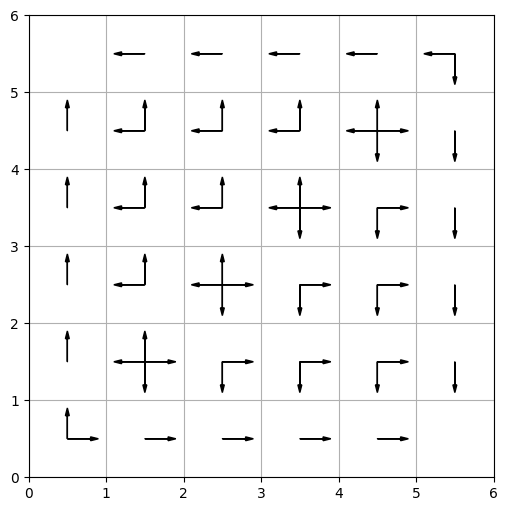

In [45]:
### Visualising the learned policy
from matplotlib.pyplot import MultipleLocator
import matplotlib.pyplot as plt
def visualse(policy):
  plt.figure(figsize=(dim,dim))
  ax = plt.gca()
  x_major_locator=MultipleLocator(1)
  ax.xaxis.set_major_locator(x_major_locator)
  ax.yaxis.set_major_locator(x_major_locator)
  plt.xlim(0, dim)
  plt.ylim(0, dim)

  for i in range(dim):
    for j in range(dim):
      if (i == 0 and j == 0) or (i == dim-1 and j == dim-1): # skip terminal state
        continue
      for action, action_prob in enumerate(policy[i,j]):
        if action_prob > 0:
          if action == 0:
            x_distance = 0
            y_distance = 0.3
          elif action == 1:
            x_distance = -0.3
            y_distance = 0
          elif action == 2:
            x_distance = 0
            y_distance = -0.3
          elif action == 3:
            x_distance = 0.3
            y_distance = 0
          plt.arrow(j+0.5, dim-i-0.5, x_distance, y_distance, head_width=0.05, head_length=0.1, fc='k', ec='k')
        else:
          continue
  plt.grid(True)
  plt.show()

visualse(policy)

## Q2: Value Iteration on the Shortest Path Problem in Gridworld

In this part, we use the shortest path problem in gridworld to illustrate how value iteration works.

In this part, **you need to do the following things**:
* Complete the implementation of value iteration on this problem with $N=5, \gamma=0.9$. To finish the implementation, you need to complete 1 function. **update_optimal_value_function**: conduct optimal Bellman Equation update iteratively.
* Visualising the final policy.


In [49]:
gamma = 0.9
dim = 5

### value iteration
def update_optimal_value_function(optimal_value_matrix):
  value_matrix = copy.deepcopy(optimal_value_matrix)
  num = len(optimal_value_matrix)
  for i in range(num):
    for j in range(num):
      value = 0
      if (i == 0 and j == 0) or (i == num-1 and j == num-1): # skip terminal state
        continue
      max_value = -np.inf
      for action in range(4): # 0 for up, 1 for left, 2 for down and 3 for right
        next_i, next_j = next_state(i, j, action, num)
        if (next_i == 0 and next_j == 0) or (next_i == num-1 and next_j == num-1):
          next_value = 0
        else:
          next_value = value_matrix[next_i, next_j]
        ### TODO: Conduct Bellman optimal equation update, refer to equation 7
        value = -1 + gamma*next_value
        max_value = value if value > max_value else max_value
        ### END
      optimal_value_matrix[i][j] = max_value
  return optimal_value_matrix

def value_iteration():
  optimal_value_matrix = np.random.randn(dim, dim)
  optimal_value_matrix[0,0] = 0
  optimal_value_matrix[-1,-1] = 0
  while True:
    prev_optimal_value_matrix = copy.deepcopy(optimal_value_matrix)
    optimal_value_matrix = update_optimal_value_function(optimal_value_matrix) # Bellman optimal equation update
    diff = np.mean((prev_optimal_value_matrix-optimal_value_matrix)**2) # calculate the difference
    if diff < eps:
      print('converge')
      # get optimal q matrix from optimal V matrix, reuse previous function because equation (2) = (6)
      optimal_q_matrix = get_q_matrix(optimal_value_matrix)
      optimal_policy = get_optimal(optimal_q_matrix)# get optimal policy from optimal Q matrix
      break
  return optimal_policy, optimal_value_matrix

In [50]:
optimal_policy, optimal_value_matrix = value_iteration()
print(optimal_policy)
print(optimal_value_matrix)

converge
[[[0.25 0.25 0.25 0.25]
  [0.   1.   0.   0.  ]
  [0.   1.   0.   0.  ]
  [0.   1.   0.   0.  ]
  [0.   0.5  0.5  0.  ]]

 [[1.   0.   0.   0.  ]
  [0.5  0.5  0.   0.  ]
  [0.5  0.5  0.   0.  ]
  [0.25 0.25 0.25 0.25]
  [0.   0.   1.   0.  ]]

 [[1.   0.   0.   0.  ]
  [0.5  0.5  0.   0.  ]
  [0.25 0.25 0.25 0.25]
  [0.   0.   0.5  0.5 ]
  [0.   0.   1.   0.  ]]

 [[1.   0.   0.   0.  ]
  [0.25 0.25 0.25 0.25]
  [0.   0.   0.5  0.5 ]
  [0.   0.   0.5  0.5 ]
  [0.   0.   1.   0.  ]]

 [[0.5  0.   0.   0.5 ]
  [0.   0.   0.   1.  ]
  [0.   0.   0.   1.  ]
  [0.   0.   0.   1.  ]
  [0.25 0.25 0.25 0.25]]]
[[ 0.    -1.    -1.9   -2.71  -3.439]
 [-1.    -1.9   -2.71  -3.439 -2.71 ]
 [-1.9   -2.71  -3.439 -2.71  -1.9  ]
 [-2.71  -3.439 -2.71  -1.9   -1.   ]
 [-3.439 -2.71  -1.9   -1.     0.   ]]


Value iteration summary
- Still the goal is to find the optimal policy. Only in value iteration, there is no policy included until the optimal value function is found:
  1. greedly get the optimal Vs using equation(7)
  2. compute the diff between pre optimal Vs vs cur optimal Vs
  3. if diff is small enough, derive optimal Qs and then optimal policy

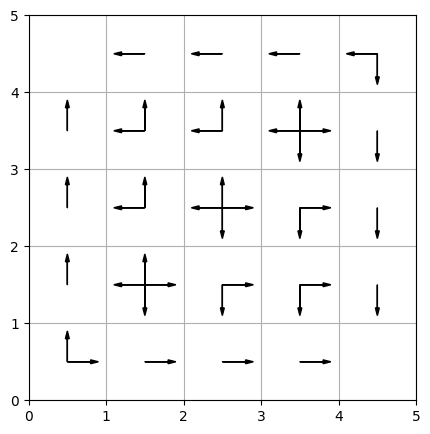

In [48]:
visualse(optimal_policy)

#Reference
The illustration of VI/PI refers to:
* https://www.davidsilver.uk/wp-content/uploads/2020/03/DP.pdf

The VI/PI algorithm refers to:
* http://incompleteideas.net/book/RLbook2020.pdf

Refer code to draw the grid plot in VI/PI:
* https://www.kaggle.com/nvtnganfb/gridworld